#What is Logistic Regression?

##Introduction

Logistic Regression is a machine learning technique that is used to predict binary dependent variables. Given a set of training data, it will fit the sigmoid function to the data by fiting coefficients of the input data. When the new fitted function is applied to testing data, the output will be a number from 0-1 representing the model's confidence that the traiing data is classified as 0 or 1. If the number is greater than 0.5 then the model predicts that the training datum is in class 1. Otherwise, it predicts the training datum is in class 0.

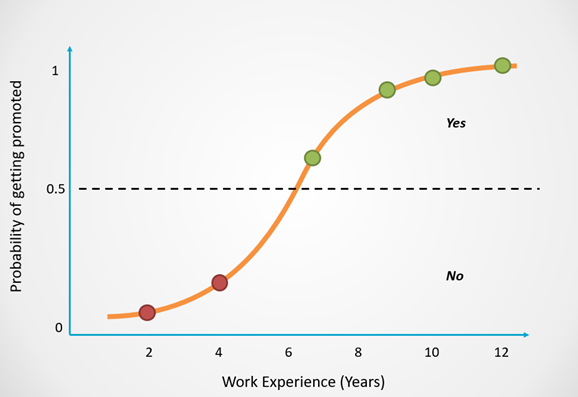

##Sigmoid Function


The sigmoid function is defined:
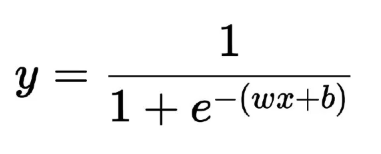

where w is are the learned weights, b are the bias term,  x is the input variable, and y is the output probability.

The output of this function when applied to training will be a probability. For example, we may input some data about weather, and y is a binary variable 1 if Maciej will go on a run, 0 otherwise. If the model outputs 0.1, this means that it predicts Maciej will not go on a run and in fact he only has a 10% chance that he will go on a run. The model will likewise predict that Maciej will not go on a run if on a new piece of datum it outputs y = 0.3. However, the model is more certain when y = 0.1 than when y = 0.3.

#Implementing Logistic Regression on Movie Data

##Task

When a movie is released, production companies would like to know whether people will like their movie. This is important to improve the reputation of the production company as well as satisfying loyal fans. It is far too costly to fully make a movie and then survey people whether they like the movie or not. It would be far preferred if a production company could predict whether or not audiences will think their movie is good depending on data about the movie.

To accomplish this task, quantify whether an audience liked a movie by using IMBD score. If IMBD score is greater than 7, then the movie is considered good. If it is lower than 7, then the movie is considered not good.

##Data Exploration

The data set has the following columns:

- **name**: The title of the movie.
- **rating**: The movie's content rating (e.g., PG, R).
- **genre**: The genre of the movie (e.g., Drama, Adventure, Comedy).
- **year**: The year the movie was released.
- **released**: The release date of the movie, including the country of release.
- **score**: The IMDb score (rating) of the movie.
- **votes**: The number of votes the movie has received on IMDb.
- **director**: The director of the movie.
- **writer**: The writer or writers of the movie.
- **star**: The main star or actor featured in the movie.
- **country**: The country where the movie was produced.
- **budget**: The production budget of the movie (in USD).
- **gross**: The total box office gross of the movie (in USD).
- **company**: The production company behind the movie.
- **runtime**: The runtime of the movie in minutes.

In [ ]:


from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Read the Excel file into a DataFrame
df = pd.read_excel(filename)  # No need for encoding issues with Excel files

# Display the first few rows
print(df.head())
df['high_score'] = df['score'].apply(lambda x: 1 if x >= 7 else 0)

Saving movies.xlsx to movies.xlsx
                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0 

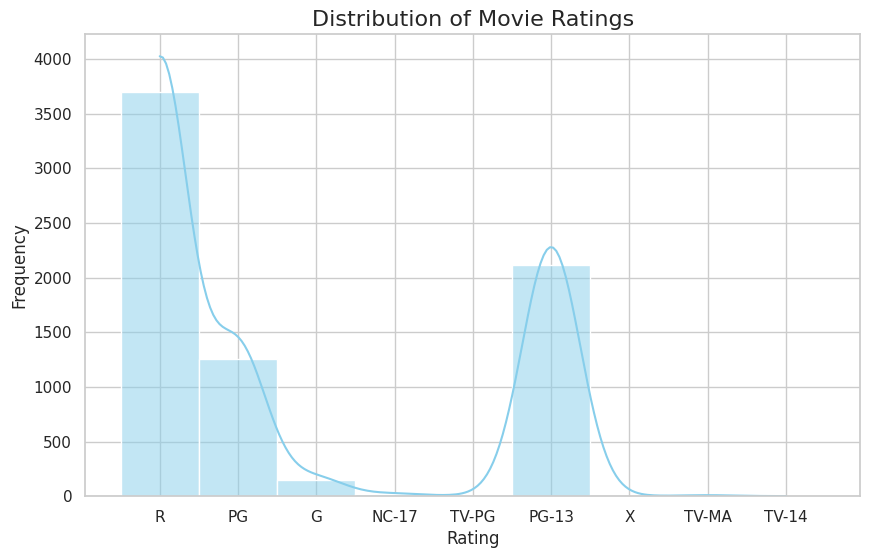

<ipython-input-12-4497f41db36b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


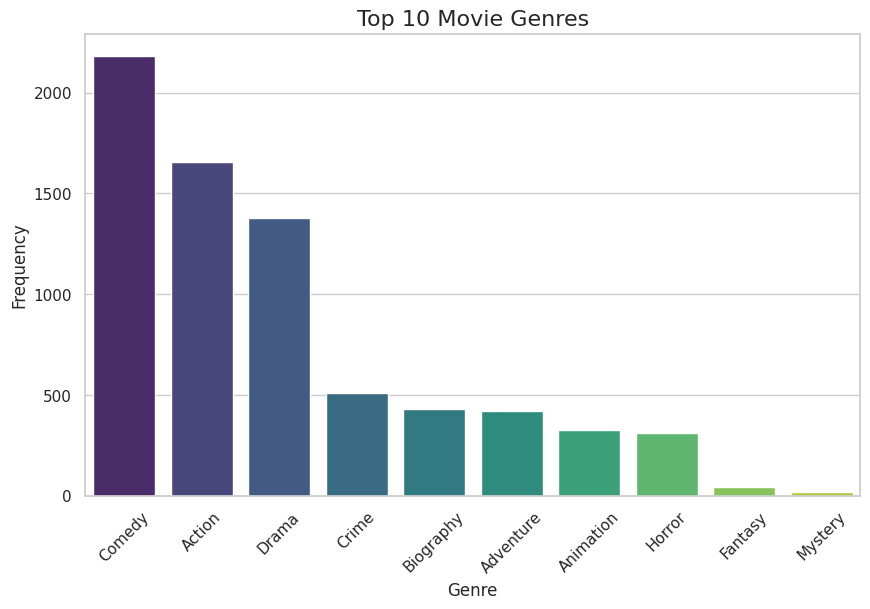

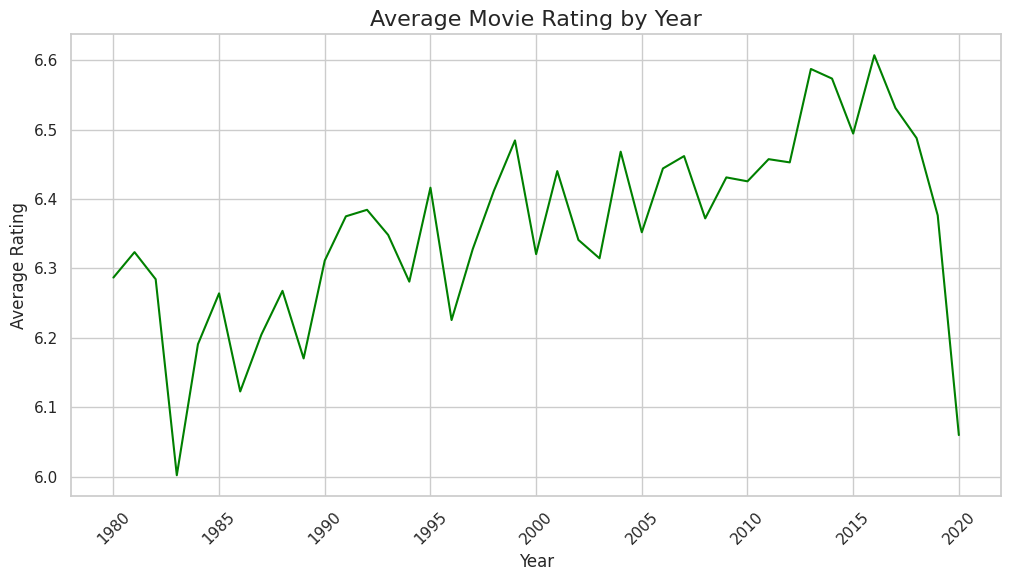

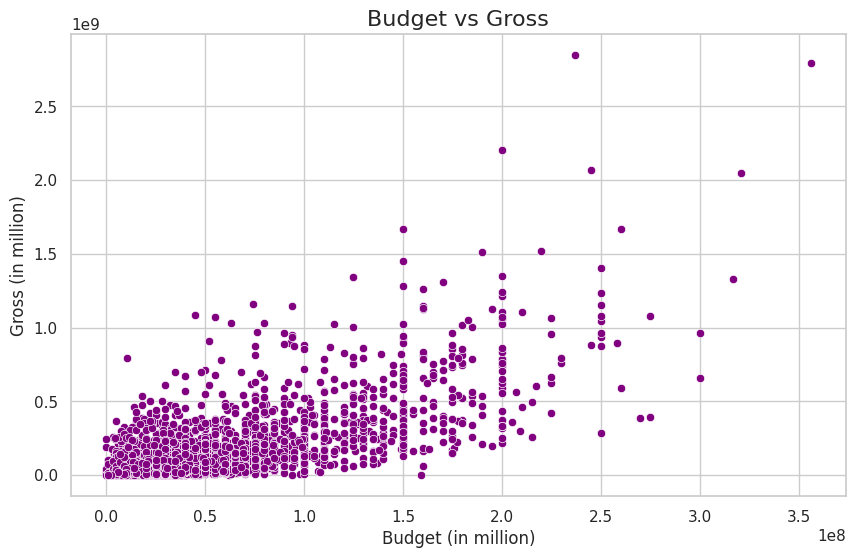

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# 1. Distribution of Movie Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 2. Top 10 Genres by Frequency
top_genres = df['genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 3. Average Rating by Year
avg_rating_year = df.groupby('year')['score'].mean().sort_index(ascending=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_year.index, y=avg_rating_year.values, color='green')
plt.title('Average Movie Rating by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# 5. Budget vs. Gross
# First, remove rows with missing values in 'budget' or 'gross'
df_clean = df.dropna(subset=['budget', 'gross'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['budget'], y=df_clean['gross'], color='purple')
plt.title('Budget vs Gross', fontsize=16)
plt.xlabel('Budget (in million)', fontsize=12)
plt.ylabel('Gross (in million)', fontsize=12)
plt.show()

In [ ]:
top_rated_movies = df.sort_values(by='score', ascending=False)

# Display the top 10 movies
top_10_rated_movies = top_rated_movies[['name', 'score', 'year', 'genre']].head(10)
print(top_10_rated_movies)

                                                   name  score  year  \
2443                           The Shawshank Redemption    9.3  1994   
5243                                    The Dark Knight    9.0  2008   
4245      The Lord of the Rings: The Return of the King    8.9  2003   
2444                                       Pulp Fiction    8.9  1994   
2247                                   Schindler's List    8.9  1993   
2445                                       Forrest Gump    8.8  1994   
3845  The Lord of the Rings: The Fellowship of the Ring    8.8  2001   
5643                                          Inception    8.8  2010   
3444                                         Fight Club    8.8  1999   
2        Star Wars: Episode V - The Empire Strikes Back    8.7  1980   

          genre  
2443      Drama  
5243     Action  
4245     Action  
2444      Crime  
2247  Biography  
2445      Drama  
3845     Action  
5643     Action  
3444      Drama  
2        Action  


## Implementing Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preprocessing
# Drop rows with missing values for simplicity
df_clean = df.dropna()

# Encode categorical columns using LabelEncoder
categorical_columns = ['genre', 'director', 'writer', 'star', 'country', 'company']  # Modify if needed
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column].astype(str))
    label_encoders[column] = le

desired_order = [ 'G', 'PG', 'PG-13', 'R', 'TV-MA', 'X']

# **Crucial Step 1: Filter df_clean to include only ratings in desired_order**
# This prevents errors during the transform step if unexpected ratings exist.
df_clean = df_clean[df_clean['rating'].isin(desired_order)].copy()

# Create a new LabelEncoder for rating
rating_encoder = LabelEncoder()

# Fit the encoder with the desired order
rating_encoder.fit(desired_order)

# **Crucial Step 2: Apply the transformation to the 'rating' column**
# This converts the string ratings ('G', 'PG', etc.) into numbers (0, 1, etc.)
# based on the order learned during the .fit() step.
df_clean['rating'] = rating_encoder.transform(df_clean['rating'])

# Save this specific encoder to your label_encoders dictionary
label_encoders['rating'] = rating_encoder

learned_order = list(rating_encoder.classes_)

print(f"Order learned by LabelEncoder: {learned_order}")
print(f"Desired order specified:      {desired_order}")

# Standardize the numerical features (optional, for better model performance)
scaler = StandardScaler()
numerical_columns = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

# 2. Define Features and Target
X = df_clean.drop(['name', 'high_score', 'released', 'score', 'votes', 'gross'], axis=1)  # Features: all columns except 'name' and 'high_score'
y = df_clean['high_score']  # Target: 'high_score' column

# 3. Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)



<ipython-input-29-c05c893e1374>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column] = le.fit_transform(df_clean[column].astype(str))
<ipython-input-29-c05c893e1374>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column] = le.fit_transform(df_clean[column].astype(str))
<ipython-input-29-c05c893e1374>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Order learned by LabelEncoder: [np.str_('G'), np.str_('PG'), np.str_('PG-13'), np.str_('R'), np.str_('TV-MA'), np.str_('X')]
Desired order specified:      ['G', 'PG', 'PG-13', 'R', 'TV-MA', 'X']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluating The Model

Accuracy: 0.7467


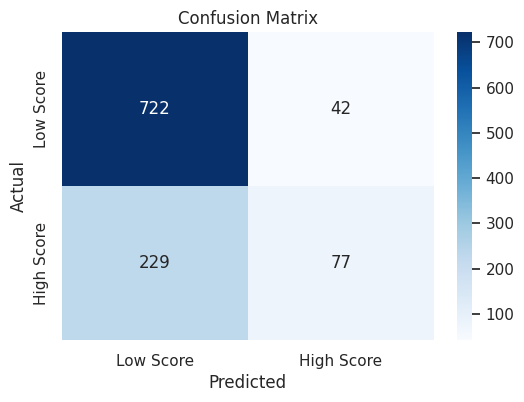

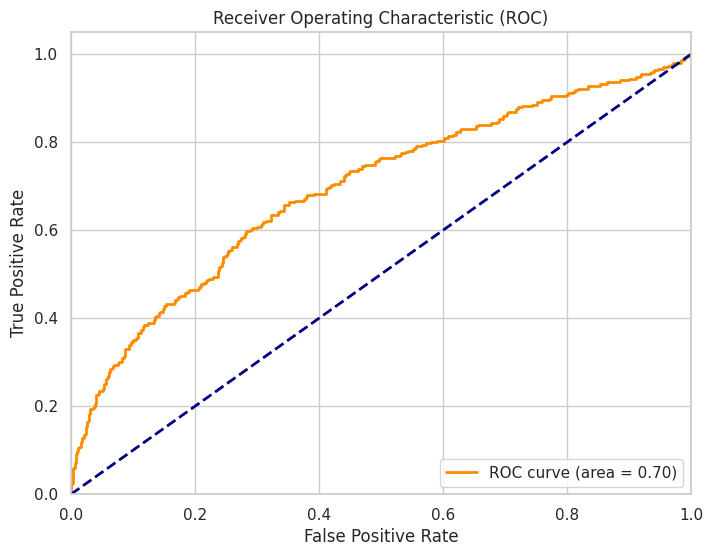

In [ ]:
# 6. Evaluate the Model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Score', 'High Score'], yticklabels=['Low Score', 'High Score'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Model Coefficients

<ipython-input-31-a0d33bd568b5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


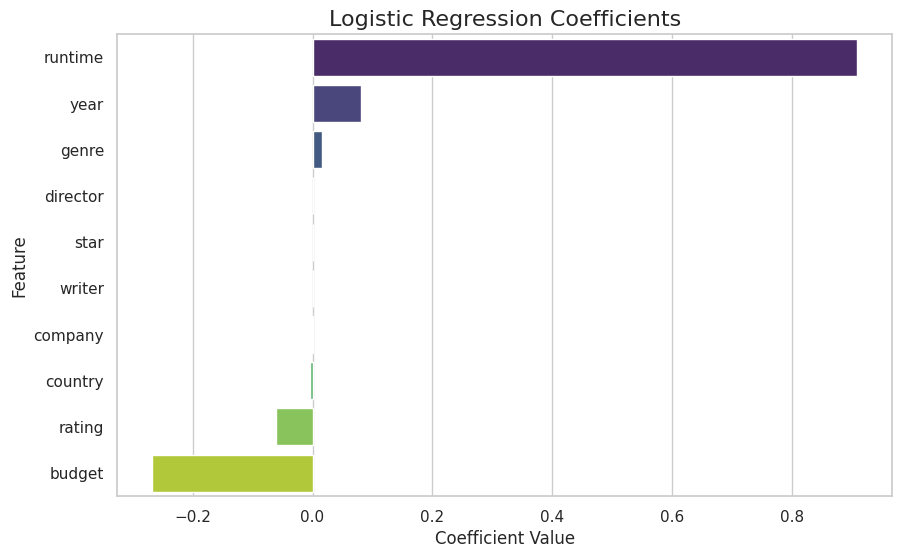

In [ ]:
# prompt: I want to create a visual to show the coefficients of the logistic regression model

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'model' and 'X' are defined from the previous code
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Logistic Regression Coefficients', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


In [ ]:
# Check how the 'rating' column was encoded

# Create a mapping of original label to encoded value
rating_mapping = dict(zip(rating_encoder.classes_, rating_encoder.transform(rating_encoder.classes_)))

# Display the mapping
print("Rating Encoding:")
for label, code in rating_mapping.items():
    print(f"{label}: {code}")

Rating Encoding:
G: 0
PG: 1
PG-13: 2
R: 3
TV-MA: 4
X: 5


##Results

The confusion matrix shows that the logistic regression model performs well for predicting whether a movie will have an IMDB score of less 7 but struggles when predicting whether a movie will have a score higher than 7. This implies that bad movies have certain shared characteristics of the given input data in this dataset, but good movies are less predictable.

The coefficient graph suggests that the more mature a movie is (X being the most mature), the lower its probability of being a good movie. Another factor is budget, where a higher budget actually predicts a lower probability of being a good movie.

It is initially surprising that higher budget movies are less probable of being good because one would assume that higher budgets would allow for higher quality sets, better actors, more famous directors, etc. However, the result of the model could be interpreted by the fact that there are many highly acclaimed movie with low budgets such as... Movies with smaller budgets may allow for directors to have more creative freedom because they are not attached to massive contracts. This could allow them to make better movies despite the lower budget. It is interesting to note that higher gross is correlated with higher budgets. This means that although higher budget movies may be worse, people are still watching them in higher numbers. This could be due to greater marketing of these high budget movies.

#Decision Tree


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# # 1. Data Preprocessing
# df_clean = df.dropna()  # Drop missing values for simplicity

# # Encode categorical columns
# categorical_columns = ['genre', 'director', 'writer', 'star', 'country', 'company', 'rating']  # Modify if needed
# label_encoders = {}

# for column in categorical_columns:
#     le = LabelEncoder()
#     df_clean[column] = le.fit_transform(df_clean[column].astype(str))
#     label_encoders[column] = le

# # Standardize numerical features for better performance
# scaler = StandardScaler()
# numerical_columns = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
# df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

# # Define Features and Target
# X = df_clean.drop(['name', 'high_score', 'released', 'score'], axis=1)
# y = df_clean['high_score']

# print(X.columns)

# # 2. Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # 3. Train Decision Tree Classifier
# tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Limit depth for better visualization
# tree_model.fit(X_train, y_train)

# # 4. Predictions
# y_pred = tree_model.predict(X_test)

# # 5. Model Evaluation
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.4f}')

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Score', 'High Score'], yticklabels=['Low Score', 'High Score'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc='lower right')
# plt.show()

# from sklearn import tree

# plt.figure (figsize =(20,8))
# a = tree.plot_tree (tree_model,
#               feature_names = X_lst,
#               class_names =  X.columns,
#               rounded = True,
#               filled = True,
#               fontsize =14)
# plt.show ()

In [ ]:
# X_lst = ['X_' + str(i) for i in range(len(X.columns))]